In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [ ]:
df=pd.read_csv('Admission_Predict_A3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


All columns contain non-null values

In [ ]:
print("Shape of Dataset:",df.shape)

Shape of Dataset: (500, 9)


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
df.rename(columns={'Chance of Admit ': 'Target'}, inplace=True)

In [ ]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Target'],
      dtype='object')


In [ ]:
df.drop(columns=["Serial No."],axis=1, inplace=True)

### Handling outliers

In [ ]:
def count_outliers(df, column):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [ ]:
count=0
for i in df.columns:
    count+=count_outliers(df,i)
count

3

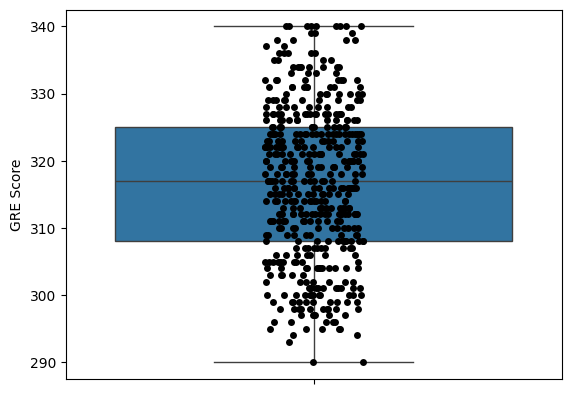

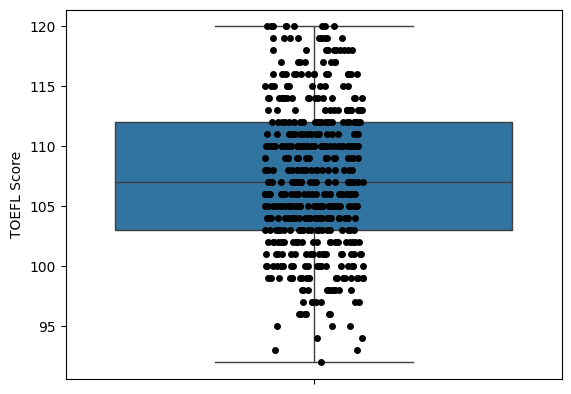

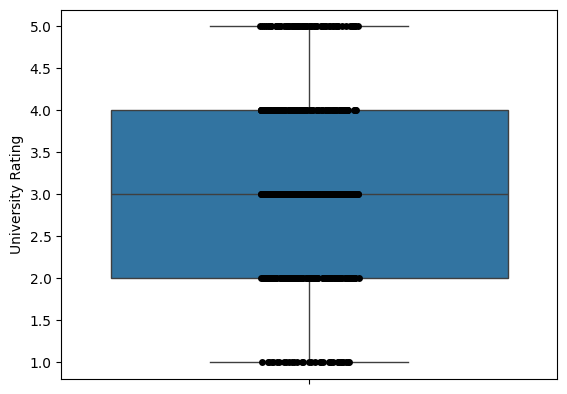

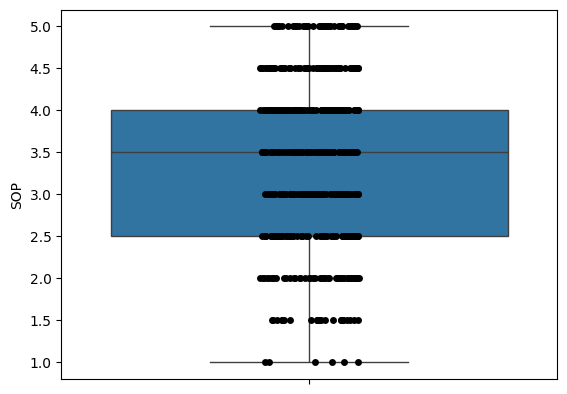

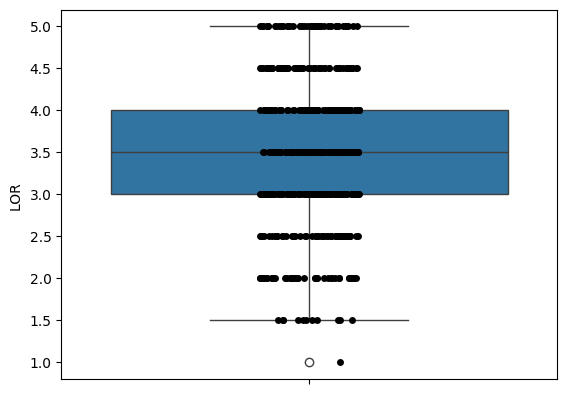

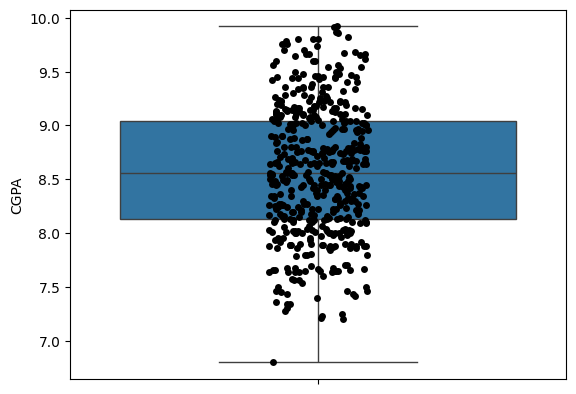

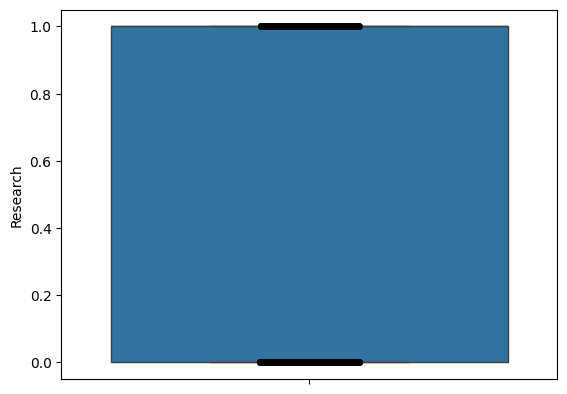

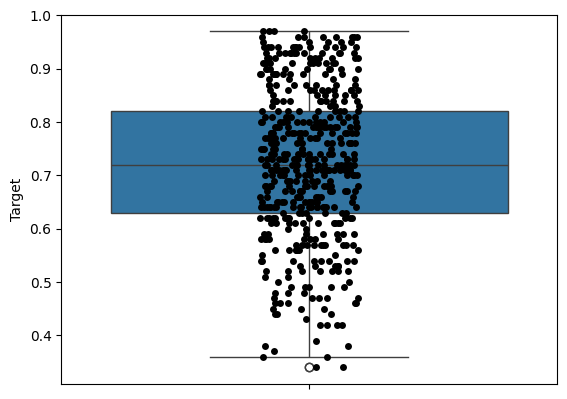

In [ ]:
for i in df.columns:
    sns.boxplot(df[i])
    sns.stripplot(data=df[i], color='black', size=5)
    plt.show()

In [ ]:
def remove_outliers(df,column):
    q1=np.percentile(df[column],25)
    q3=np.percentile(df[column],75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return df

In [ ]:
for i in df.columns:
   df= remove_outliers(df,i)

### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler=StandardScaler()
scaler1=MinMaxScaler()
scaler2=RobustScaler()

x=df.drop(columns=["Target"],axis=1).copy()

In [ ]:
# Standard Scaler
x1=scaler.fit_transform(x).copy()
x1=pd.DataFrame(x1,columns=x.columns)
x1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924
...,...,...,...,...,...,...,...
492,1.373315,0.122793,1.647217,1.136549,0.552405,0.728519,0.880341
493,1.818719,1.615324,1.647217,1.643609,1.641871,2.143389,0.880341
494,1.195153,2.112834,1.647217,1.136549,1.641871,1.627378,0.880341
495,-0.408302,-0.706391,0.769761,0.629489,1.641871,-0.253568,-1.135924


In [ ]:
# MinMax Scaler
x2=scaler1.fit_transform(x).copy()
x2=pd.DataFrame(x2,columns=df.drop(columns=["Target"], axis=1).columns)
x2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0
...,...,...,...,...,...,...,...
492,0.84,0.571429,1.00,0.875,0.714286,0.711538,1.0
493,0.94,0.892857,1.00,1.000,1.000000,0.983974,1.0
494,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0
495,0.44,0.392857,0.75,0.750,1.000000,0.522436,0.0


In [ ]:
# Robust Scaler
x3=scaler2.fit_transform(x).copy()
x3=pd.DataFrame(x3,columns=df.drop(columns=["Target"], axis=1).columns)
x3

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.176471,1.222222,0.5,0.666667,1.0,1.197802,0.0
1,0.411765,0.000000,0.5,0.333333,1.0,0.340659,0.0
2,-0.058824,-0.333333,0.0,-0.333333,0.0,-0.615385,0.0
3,0.294118,0.333333,0.0,0.000000,-1.0,0.120879,0.0
4,-0.176471,-0.444444,-0.5,-1.000000,-0.5,-0.384615,-1.0
...,...,...,...,...,...,...,...
492,0.882353,0.111111,1.0,0.666667,0.5,0.505495,0.0
493,1.176471,1.111111,1.0,1.000000,1.5,1.439560,0.0
494,0.764706,1.444444,1.0,0.666667,1.5,1.098901,0.0
495,-0.294118,-0.444444,0.5,0.333333,1.5,-0.142857,-1.0


In [ ]:
#store y for future use in regression models
y=df["Target"].copy()

## Analyzing distribution and selecting best feature scaling

Mean Squared Error with Standard Scaler: 0.003673319896222301
Mean Squared Error with MinMax Scaler: 0.0036733198962223034
Mean Squared Error with Robust Scaler: 0.0036733198962223003


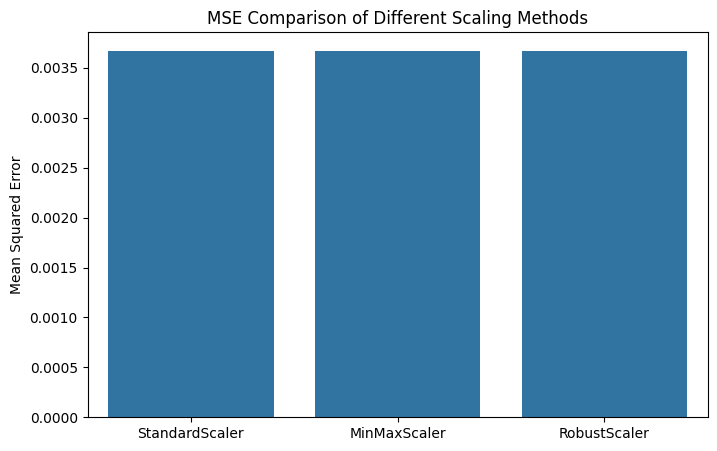

The minimum MSE for the scaling approaches is for Standard Scaler


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(x2, y, test_size=0.2, random_state=42)
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(x3, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_standard = mean_squared_error(y_test, y_pred)


model.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = model.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test_minmax, y_pred_minmax)


model.fit(X_train_robust, y_train_robust)
y_pred_robust = model.predict(X_test_robust)
mse_robust = mean_squared_error(y_test_robust, y_pred_robust)


print(f"Mean Squared Error with Standard Scaler: {mse_standard}")
print(f"Mean Squared Error with MinMax Scaler: {mse_minmax}")
print(f"Mean Squared Error with Robust Scaler: {mse_robust}")


scaling_methods = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
mse_values = [mse_standard, mse_minmax, mse_robust]

plt.figure(figsize=(8, 5))
sns.barplot(x=scaling_methods, y=mse_values)
plt.title('MSE Comparison of Different Scaling Methods')
plt.ylabel('Mean Squared Error')
plt.show()
print('The minimum MSE for the scaling approaches is for Standard Scaler')


## LDA and Binning technique


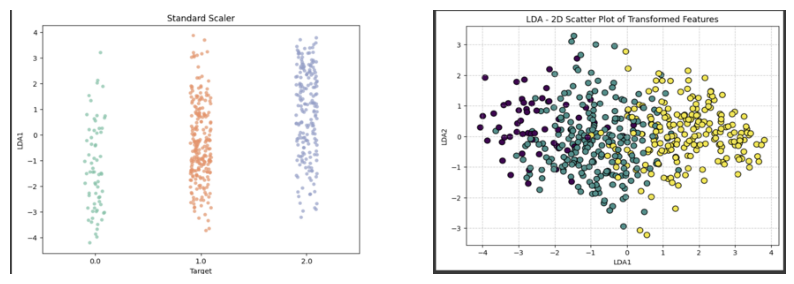

In [ ]:
from google.colab import files
from PIL import Image

image_path = "/content/LDA_1.png"
img = Image.open(image_path)

img1_resized = img.resize((400, 300))
image_path = "/content/LDA_1.png"
image_path2="/content/LDA_2.png"
img2 = Image.open(image_path2)
img2_resized=img2.resize((400,300))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].imshow(img1_resized)
axes[0].axis('off')  # Turn off axes for the first image

axes[1].imshow(img2_resized)
axes[1].axis('off')  # Turn off axes for the second image

plt.show()

LDA's primary goal is to maximize the separation between different classes. In our  case, if the plot with 1 component shows a clear separation between the classes , it suggests that the majority of the variance related to class separability is captured by this component. Hence, retaining only 1 component is justifiable.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(df[['Target']])
df['Target'] = est.transform(df[['Target']]).flatten()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(X,Y):
    clf = LinearDiscriminantAnalysis(n_components=1)
    new_X= clf.fit_transform(X, Y)

    new_data =pd.DataFrame(data=new_X, columns=["LDA1"])
    new_data = new_data.reset_index(drop=True)
    Y = Y.reset_index(drop=True)
    new_data["Target"]=Y
    return new_data

In [ ]:
y1=df["Target"].copy()
np.unique(y1)

array([0., 1., 2.])

In [ ]:
df_normalized=x1.copy()
df_normalized.isna().sum()
y_target=pd.DataFrame(y,columns=["Target"])
df_normalized = df_normalized.reset_index(drop=True)
y_target = y_target.reset_index(drop=True)
# Assigning the target column
df_normalized["Target"] = y_target
df_normalized.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Target,0


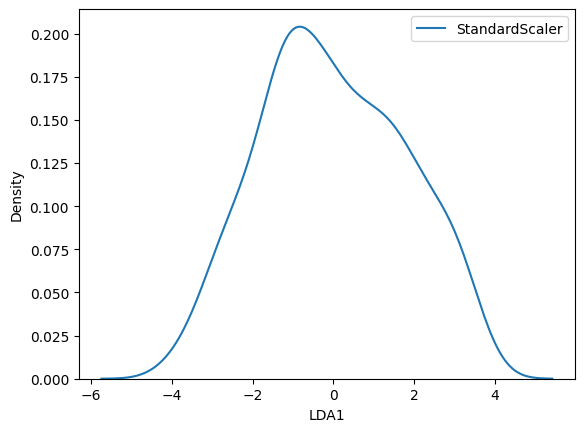

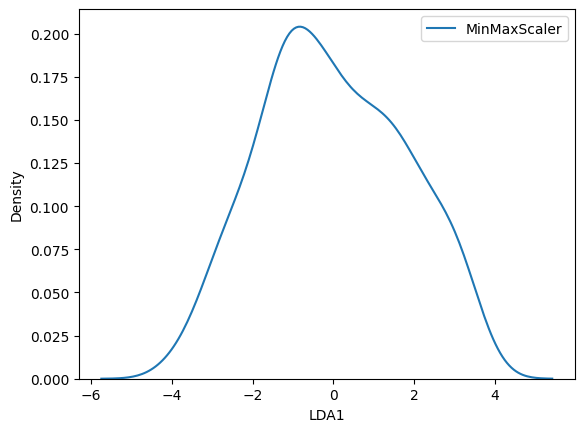

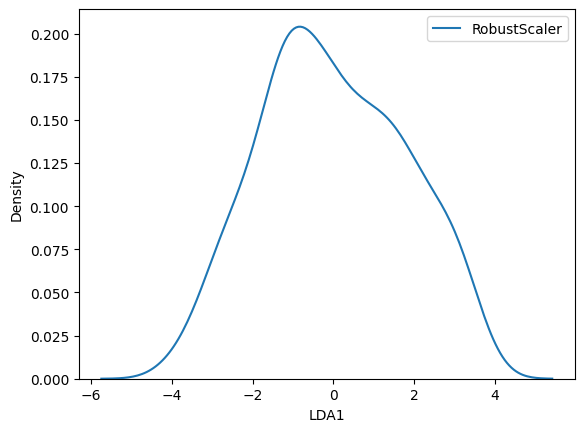

In [ ]:
standard_scaler_df= LDA(x1,y1)
min_max_df=LDA(x2,y1)
robust_df=LDA(x3,y1)

sns.kdeplot(standard_scaler_df.iloc[:, 0], label="StandardScaler")
plt.legend()
plt.show()

sns.kdeplot(min_max_df.iloc[:, 0], label="MinMaxScaler")
plt.legend()
plt.show()

sns.kdeplot(robust_df.iloc[:, 0], label="RobustScaler")
plt.legend()
plt.show()

#### This Shows That LDA is invariant to linear transformation (Feature Scaling)

In [ ]:

standard_scaler_df

,LDA1,Target
0,3.189680,2.0
1,1.076721,1.0
2,-0.938311,1.0
3,0.437453,2.0
4,-1.435686,1.0
...,...,...
492,1.529405,2.0
493,3.692770,2.0
494,3.234085,2.0
495,-0.495402,1.0


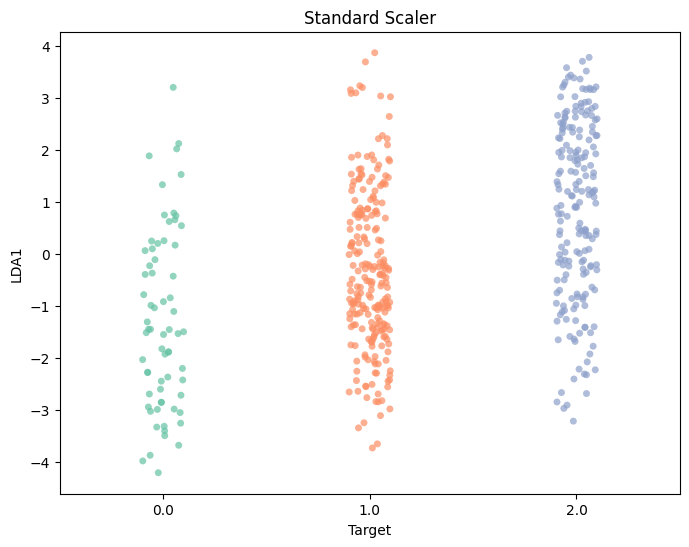

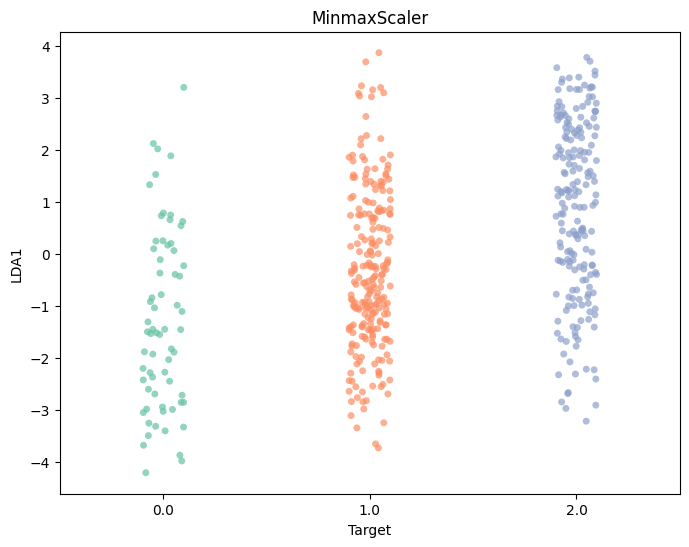

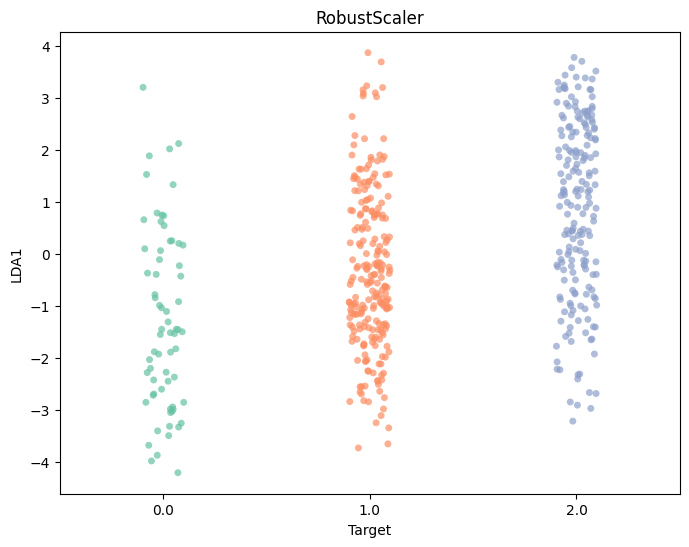

In [ ]:
def visualize(scaling_name, df1):
    plt.figure(figsize=(8, 6))
    sns.stripplot(x=df['Target'], y=df1['LDA1'], hue=df['Target'], jitter=True, palette="Set2", alpha=0.7, legend=False)
    plt.xlabel("Target")
    plt.ylabel("LDA1")
    plt.title(scaling_name)
    plt.show()

visualize("Standard Scaler",standard_scaler_df)
visualize("MinmaxScaler",min_max_df)
visualize("RobustScaler",robust_df)

### Linear Regression Model
1. Scikit Learn
2. TensorFlow

### Scikit Learn Regression Model

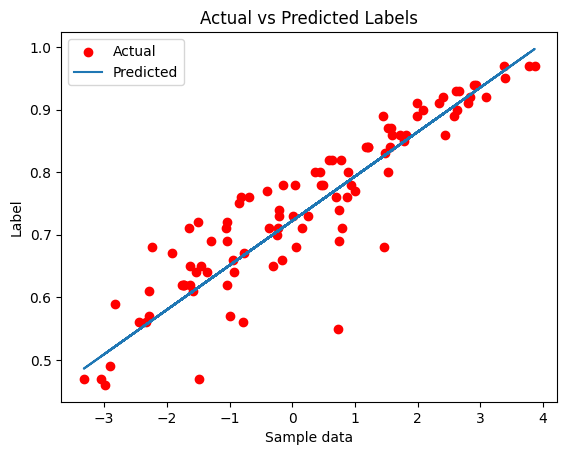

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(standard_scaler_df.drop(columns=["Target"]), y, test_size=0.2)
model.fit(x_train,y_train)
y_pred_sklearn=model.predict(x_test)
plt.scatter(x_test, y_test, label='Actual',color='red')
plt.plot(x_test, y_pred_sklearn, label='Predicted')
plt.legend()
plt.xlabel('Sample data')
plt.ylabel('Label')
plt.title('Actual vs Predicted Labels')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_preds=model.predict(x_test)
mse_sklearn=mean_squared_error(y_test,y_preds)
r2_score_sklearn=r2_score(y_true=y_test,y_pred=y_preds)
print("MSE: ",mse_sklearn,"R^2 Score: ",r2_score_sklearn)

MSE:  0.0028609685595651514 R^2 Score:  0.8262820079637215


### TensorFlow Regression Model

Epoch 100: Loss = 0.013280034996569157
Epoch 200: Loss = 0.0036149551160633564
Epoch 300: Loss = 0.0034432588145136833
Epoch 400: Loss = 0.0034402087330818176
Epoch 500: Loss = 0.0034401549492031336
Epoch 600: Loss = 0.003440154017880559
Epoch 700: Loss = 0.0034401537850499153
Epoch 800: Loss = 0.0034401537850499153
Epoch 900: Loss = 0.0034401537850499153
Epoch 1000: Loss = 0.0034401537850499153


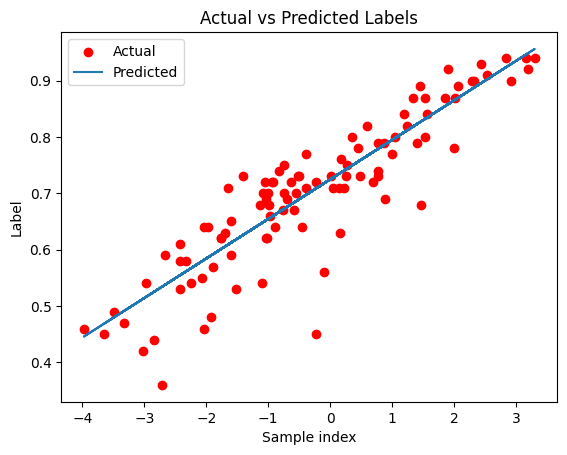

Loss for tensorflow linear regression:0.0036053324583917856
Mean squared error:0.0036053322963888984
R2 score for tf:0.7996365282356469


In [ ]:
from sklearn.model_selection import train_test_split
accuracy_max=0
loss=0
X_train, X_test, y_train, y_test = train_test_split(standard_scaler_df.drop(columns="Target"), y, test_size=0.2, random_state=42)
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)
n_features = X_train.shape[1]
W = tf.Variable(tf.random.normal([n_features, 1]), dtype=tf.float32)
b = tf.Variable(tf.zeros([1]), dtype=tf.float32)

def linear_regression(X):
    return tf.matmul(X,W) + b

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X)

        loss = compute_loss(y, y_pred)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss

y_train_tensor = tf.reshape(y_train_tensor, [-1, 1])
y_test_tensor = tf.reshape(y_test_tensor, [-1, 1])

n_epochs = 1000
for epoch in range(n_epochs):
    loss = train_step(X_train_tensor, y_train_tensor)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.numpy()}")

y_pred_tensor = linear_regression(X_test_tensor)
y_pred_tf = y_pred_tensor.numpy()
plt.scatter(X_test, y_test, label='Actual',color='red')
plt.plot(X_test, y_pred_tf, label='Predicted', )
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Label')
plt.title('Actual vs Predicted Labels')
plt.show()

loss_tf=compute_loss(y_test_tensor,y_pred_tensor).numpy()
mse_tf=mean_squared_error(y_test,y_pred_tf)
r2_score_tf=r2_score(y_test,y_pred_tf)


print(f"Loss for tensorflow linear regression:{loss_tf}")
print(f"Mean squared error:{mse_tf}")
print(f"R2 score for tf:{r2_score_tf}")

## Comparing results and accuracy of both models


| Model                        | R² Score  | Loss       |
|------------------------------|-----------|------------|
| Linear Regression (Sklearn)   | 83.32%    | 0.00352538 |
| Linear Regression (TF)        | 79.96%    | 0.00360533 |



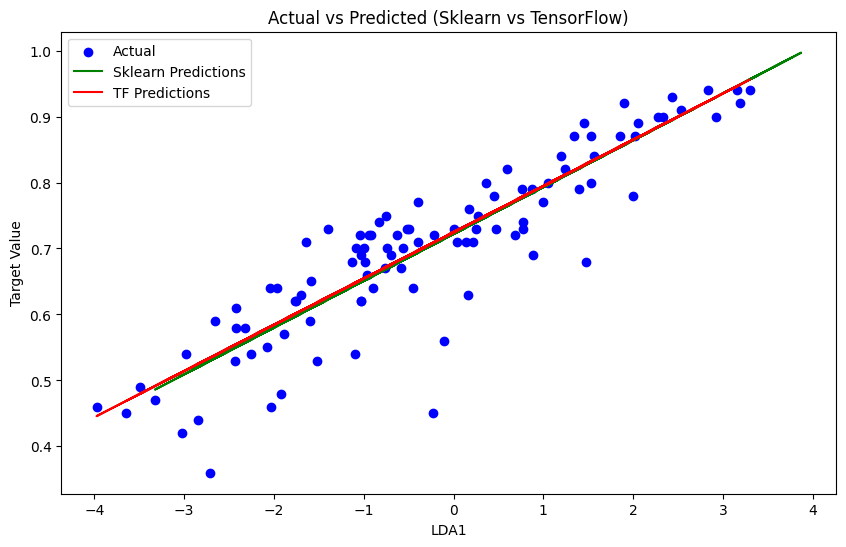

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(x_test, y_pred_sklearn, label='Sklearn Predictions',  color='green')
plt.plot(X_test, y_pred_tf, label='TF Predictions', color='red')
plt.legend()
plt.xlabel('LDA1')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted (Sklearn vs TensorFlow)')
plt.show()


## Logistic regression

In [ ]:
data=df_normalized.copy()
data


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,0.92
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.76
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,0.72
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.80
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,0.65
...,...,...,...,...,...,...,...,...
492,1.373315,0.122793,1.647217,1.136549,0.552405,0.728519,0.880341,0.87
493,1.818719,1.615324,1.647217,1.643609,1.641871,2.143389,0.880341,0.96
494,1.195153,2.112834,1.647217,1.136549,1.641871,1.627378,0.880341,0.93
495,-0.408302,-0.706391,0.769761,0.629489,1.641871,-0.253568,-1.135924,0.73


In [ ]:
bin_edges=[0.3,0.5,0.7,1]
bin_labels=["low","medium","high"]
data['Target']=pd.cut(data['Target'], bins=bin_edges, labels=bin_labels,include_lowest=True)
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,high
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,high
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,high
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,high
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,medium


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models
X=data.drop(columns="Target")
Y=data["Target"]
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.values.reshape(-1, 1)).toarray()
X_train , X_test, Y_train , Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)



model= models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4991 - loss: 1.0180 - val_accuracy: 0.5125 - val_loss: 0.9112
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5607 - loss: 0.8477 - val_accuracy: 0.6125 - val_loss: 0.8243
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6374 - loss: 0.7523 - val_accuracy: 0.6500 - val_loss: 0.7716
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.7271 - val_accuracy: 0.6500 - val_loss: 0.7361
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - loss: 0.7669 - val_accuracy: 0.6625 - val_loss: 0.7100
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7228 - loss: 0.6413 - val_accuracy: 0.6750 - val_loss: 0.6899
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.6221 - val_accuracy: 0.6875 - val_loss: 0.6728
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.6814 - val_accuracy: 0.6875 - val_loss: 0.6

In [ ]:
logistic_loss,logistic_acc=model.evaluate(X_test,Y_test)
print(f"Accuracy={100*logistic_acc:.2f}%, Loss for tensorflow Logistic Regression={logistic_loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.5981  
Accuracy=78.00%, Loss for tensorflow Logistic Regression=0.5704460740089417


## Metrics Analysis

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred,average="macro", zero_division=np.nan)
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")


    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return accuracy


##  Learning Rates and Hyperparameter Tuning

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score

learning_rates_exp = [0.0001, 0.005, 0.01, 0.7, 0.9]
lambda1 = [0.0001, 0.001, 0.01]
results = []
for lr in learning_rates_exp:
    for reg_strength in lambda1:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],),
                                  kernel_regularizer=tf.keras.regularizers.l2(reg_strength))
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                      loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, Y_train, epochs=100, batch_size=10,
                            validation_split=0.2, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(Y_test, axis=1)

        accuracy = np.mean(y_pred_classes == y_test_classes)
        f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
        loss = model.evaluate(X_test, Y_test, verbose=0)[0]
        roc_auc = roc_auc_score(Y_test, y_pred, average="macro", multi_class="ovr")

        results.append({
            'learning_rate': lr,
            'regularization_strength': reg_strength,
            'accuracy': accuracy,
            'f1_score': f1,
            'loss': loss,
            'roc_auc': roc_auc,
            'final_loss': history.history['loss'][-1],
            'convergence_speed': history.history['loss'][-1]
        })

results_df = pd.DataFrame(results)
best_accuracy = results_df.loc[results_df['accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['f1_score'].idxmax()]
best_loss = results_df.loc[results_df['loss'].idxmin()]
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]
best_convergence = results_df.loc[results_df['final_loss'].idxmin()]
print("Best model based on accuracy:")
print(best_accuracy)
print("\nBest model based on F1 score:")
print(best_f1)
print("\nBest model based on loss:")
print(best_loss)
print("\nBest model based on ROC AUC:")
print(best_roc_auc)
print("\nBest model based on convergence speed (final loss):")
print(best_convergence)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Best model based on accuracy:
learning_rate              0.005000
regularization_strength    0.001000
accuracy                   0.800000
f1_score                   0.760815
loss                       0.601669
roc_auc                    0.827120
final_loss                 0.473195
convergence_speed          0.473195
Name: 4, dtype: float64

Best model based on F1 score:
learning_rate              0.900000
regularization_strength    0.010000
accuracy                   0.790000
f1_score                   0.783029
loss                       0.583983
roc_auc                    0.886641
final_loss                 0.519804
convergence_speed          0.519804
Name: 14, dtype: float64

Best model based on loss:
learning_rate              0.010000
regularization_strength    0.000100
accuracy                   0.780000
f1_score                   0.742969
loss                       0.574184
roc_auc                    0.862584
final_loss                 0.4455

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_estimators = [50, 100, 200]
max_depth = [5, 10, 20]
results = []

for n_est in n_estimators:
    for maxi in max_depth:
        Rf = RandomForestClassifier(n_estimators=n_est, max_depth=maxi)
        start_time = time.time()
        Rf.fit(X_train, Y_train)
        training_time = time.time() - start_time
        Y_pred_Rf = Rf.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred_Rf)
        f1 = f1_score(Y_test, Y_pred_Rf, average='weighted')
        error_rate = 1 - accuracy
        results.append((n_est, maxi, accuracy, f1, error_rate, training_time))

        print(f"Metrics for max_depth={maxi}, n_estimators={n_est}:")
        print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Error Rate: {error_rate:.4f}, Training Time: {training_time:.4f} seconds")

results_df = pd.DataFrame(results, columns=['n_estimators', 'max_depth', 'accuracy', 'f1_score', 'error_rate', 'training_time'])
best_f1_model = results_df.loc[results_df['f1_score'].idxmax()]
best_accuracy_model = results_df.loc[results_df['accuracy'].idxmax()]
best_loss_model = results_df.loc[results_df['error_rate'].idxmin()]

print("\nBest Model based on F1 Score:")
print(best_f1_model)

print("\nBest Model based on Accuracy:")
print(best_accuracy_model)

print("\nBest Model based on Error Rate (Loss):")
print(best_loss_model)


Metrics for max_depth=5, n_estimators=50:
Accuracy: 0.7800, F1 Score: 0.7838, Error Rate: 0.2200, Training Time: 0.0983 seconds
Metrics for max_depth=10, n_estimators=50:
Accuracy: 0.7700, F1 Score: 0.7732, Error Rate: 0.2300, Training Time: 0.0978 seconds
Metrics for max_depth=20, n_estimators=50:
Accuracy: 0.7300, F1 Score: 0.7503, Error Rate: 0.2700, Training Time: 0.0925 seconds
Metrics for max_depth=5, n_estimators=100:
Accuracy: 0.7900, F1 Score: 0.7932, Error Rate: 0.2100, Training Time: 0.1711 seconds
Metrics for max_depth=10, n_estimators=100:
Accuracy: 0.7700, F1 Score: 0.7698, Error Rate: 0.2300, Training Time: 0.1842 seconds
Metrics for max_depth=20, n_estimators=100:
Accuracy: 0.7400, F1 Score: 0.7521, Error Rate: 0.2600, Training Time: 0.2049 seconds
Metrics for max_depth=5, n_estimators=200:
Accuracy: 0.7800, F1 Score: 0.7798, Error Rate: 0.2200, Training Time: 0.3613 seconds
Metrics for max_depth=10, n_estimators=200:
Accuracy: 0.7800, F1 Score: 0.7769, Error Rate: 0.22

## Model Evaluation

### K-Cross Validation


1. RandomForestClassifier
2. Logistic regression

Random Forest - Mean Accuracy: 0.7330, Std Dev: 0.0615
Logistic Regression - Mean Accuracy: 0.7329, Std Dev: 0.0376


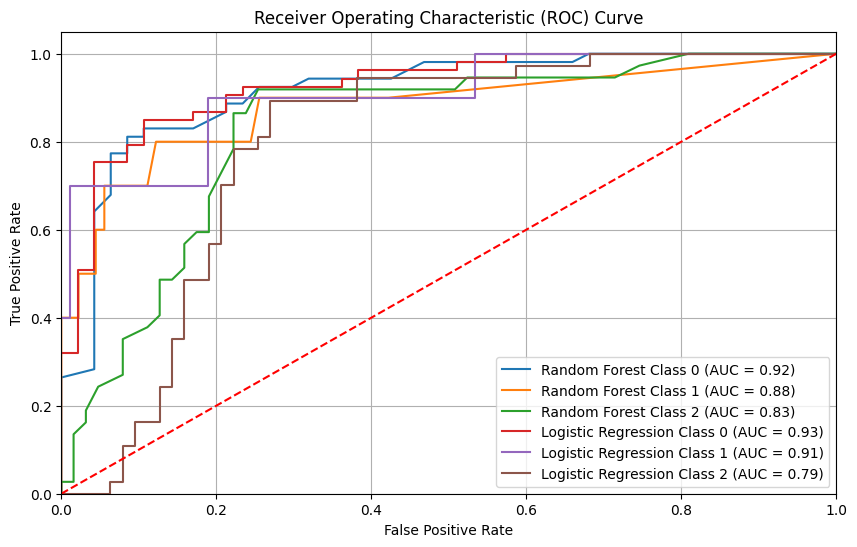

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y_binarized = label_binarize(y, classes=np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)
models = {
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000))
}

k = 5
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)
    for i in range(y_scores.shape[1]):
        fpr, tpr, thresholds = roc_curve(y_test[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

y_binarized = label_binarize(y, classes=np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

models = {
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000))
}

metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    auc_scores = []
    for i in range(y_scores.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)

    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_scores
    }

for model_name, model_metrics in metrics.items():
    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {model_metrics['Accuracy']:.4f}")
    print(f"Precision: {model_metrics['Precision']:.4f}")
    print(f"Recall: {model_metrics['Recall']:.4f}")
    print(f"F1 Score: {model_metrics['F1 Score']:.4f}")
    print(f"AUC-ROC (per class): {model_metrics['AUC-ROC']}")
    print("---")


Random Forest Performance Metrics:
Accuracy: 0.7600
Precision: 0.7926
Recall: 0.6740
F1 Score: 0.7085
AUC-ROC (per class): [0.9152950622240064, 0.8799999999999999, 0.8294723294723295]
---
Logistic Regression Performance Metrics:
Accuracy: 0.7000
Precision: 0.7830
Recall: 0.6506
F1 Score: 0.6943
AUC-ROC (per class): [0.9261340826977118, 0.9055555555555554, 0.7945087945087945]
---


### Areas of Improvement
*   Extensive Grid Search for Hyperparameter Tuning which might increase computational costs
*   Handling imbalance in class distributions by resampling the data
*   Exploring models other than logisitic regression and Random Forest such as Stacking or Boosting
*   Using advanced algorithms for feature selection to improve model interpretability and performance







### Potiential Bias


*   Data Bias - Dataset may have inherent bias which might have arisen due to errors in data collection or preprocessing
*   Feature Bias - Some features may correlate strongly with some attributes while weakly with others
*   Inherent Bias in model - Models can be sensitive to choice of hyperparameters as well as have inherent definition based bias
*   Evaluation Metric Bias - A model might perform well on a single evaluatiob metric but may perform poorly with respect to other metrics





### Optional Tasks

LDA helps in reducing the data complexity by dimensionality reduction while maintaining separation of classes.

In [4]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('Admission_Predict_A3.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

bins = [0, 0.33, 0.67, 1]
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(y, bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=68)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train_encoded)
X_test_lda = lda.transform(X_test)

def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return training_time, mse, r2

def gradient_descent(X, y, learning_rate=0.01, n_epochs=1000, batch_size=32, method='mini-batch'):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(X_b.shape[1])
    history = []

    for epoch in range(n_epochs):
        if method == 'full-batch':
            gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
            theta -= learning_rate * gradients
            y_pred = X_b.dot(theta)
            mse = mean_squared_error(y, y_pred)
            history.append(mse)

        elif method == 'mini-batch':
            for i in range(0, m, batch_size):
                X_batch = X_b[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
                theta -= learning_rate * gradients
            y_pred = X_b.dot(theta)
            mse = mean_squared_error(y, y_pred)
            history.append(mse)

        elif method == 'stochastic':
            for i in range(m):
                random_index = np.random.randint(m)
                X_single = X_b[random_index:random_index + 1]
                y_single = y[random_index:random_index + 1]
                gradients = 2 * X_single.T.dot(X_single.dot(theta) - y_single)
                theta -= learning_rate * gradients
            y_pred = X_b.dot(theta)
            mse = mean_squared_error(y, y_pred)
            history.append(mse)

    return theta, history

def run_gradient_descent_experiments(X, y):
    learning_rates = [0.0001, 0.001, 0.01]
    batch_sizes = [1, 16, len(y)]

    for lr in learning_rates:
        for batch_size in batch_sizes:
            if batch_size == 1:
                method = 'stochastic'
            elif batch_size == len(y):
                method = 'full-batch'
            else:
                method = 'mini-batch'

            print(f"Learning Rate: {lr}, Batch Size: {batch_size} ({method})")
            start_time = time.time()
            theta, history = gradient_descent(X, y, learning_rate=lr, n_epochs=1000, batch_size=batch_size, method=method)
            training_time = time.time() - start_time
            final_mse = history[-1]
            print(f"Training Time: {training_time:.4f}, Final MSE: {final_mse:.4f}")

print("\nRunning Gradient Descent Experiments on Original Data:")
run_gradient_descent_experiments(X_train, y_train_encoded)
print("\nRunning Gradient Descent Experiments on LDA Transformed Data:")
run_gradient_descent_experiments(X_train_lda, y_train_encoded)
orig_time, orig_mse, orig_r2 = train_and_evaluate(X_train, X_test, y_train_encoded, y_test_encoded)
lda_time, lda_mse, lda_r2 = train_and_evaluate(X_train_lda, X_test_lda, y_train_encoded, y_test_encoded)
print(f"\nOriginal Data - Time: {orig_time:.4f}, MSE: {orig_mse:.4f}, R²: {orig_r2:.4f}")
print(f"LDA Transformed Data - Time: {lda_time:.4f}, MSE: {lda_mse:.4f}, R²: {lda_r2:.4f}")


Running Gradient Descent Experiments on Original Data:
Learning Rate: 0.0001, Batch Size: 1 (stochastic)
Training Time: 5.1876, Final MSE: 0.1136
Learning Rate: 0.0001, Batch Size: 16 (mini-batch)
Training Time: 0.6273, Final MSE: 0.4973
Learning Rate: 0.0001, Batch Size: 400 (full-batch)
Training Time: 0.4312, Final MSE: 1.4711
Learning Rate: 0.001, Batch Size: 1 (stochastic)
Training Time: 6.0970, Final MSE: 0.1067
Learning Rate: 0.001, Batch Size: 16 (mini-batch)
Training Time: 0.9641, Final MSE: 0.1264
Learning Rate: 0.001, Batch Size: 400 (full-batch)
Training Time: 0.4250, Final MSE: 0.4148
Learning Rate: 0.01, Batch Size: 1 (stochastic)
Training Time: 5.8718, Final MSE: 0.1083
Learning Rate: 0.01, Batch Size: 16 (mini-batch)
Training Time: 0.6435, Final MSE: 0.1067
Learning Rate: 0.01, Batch Size: 400 (full-batch)
Training Time: 0.4241, Final MSE: 0.1255

Running Gradient Descent Experiments on LDA Transformed Data:
Learning Rate: 0.0001, Batch Size: 1 (stochastic)
Training Tim

The performance in terms of MSE and R^2 remains same but the reduced training time shows that LDA is more efficient.